In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X, y = breast_cancer.data, breast_cancer.target

print(f"Breast Cancer features: {breast_cancer.feature_names}")
print(f"Breast Cancer target: {breast_cancer.target_names}")

Breast Cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer target: ['malignant' 'benign']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (455, 30), y_train: (455,)
Shape of X_test: (114, 30), y_test: (114,)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_sklearn = RandomForestClassifier(n_estimators=7, max_depth=1, criterion='entropy', random_state=42)
rf_sklearn.fit(X_train, y_train.ravel())

rf_skl_predictions = rf_sklearn.predict(X_test)

print(f"Sklearn RF Accuracy: {accuracy_score(y_test, rf_skl_predictions):.3f}")
print(f"Sklearn RF F1-Score: {f1_score(y_test, rf_skl_predictions, average='weighted'):.3f}")

Sklearn RF Accuracy: 0.939
Sklearn RF F1-Score: 0.938


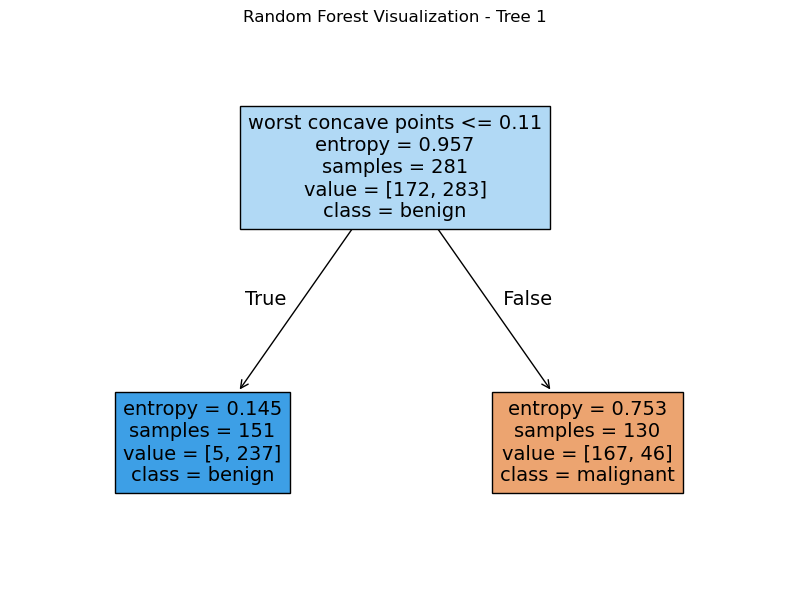

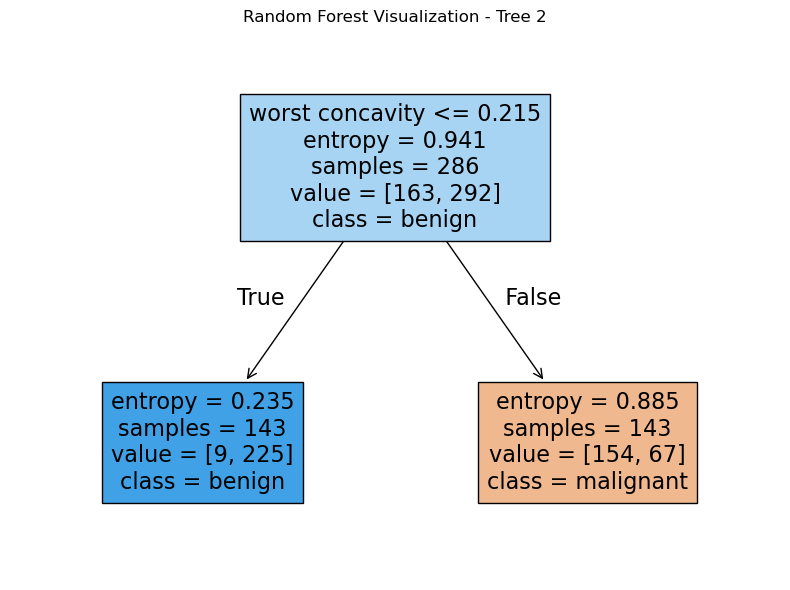

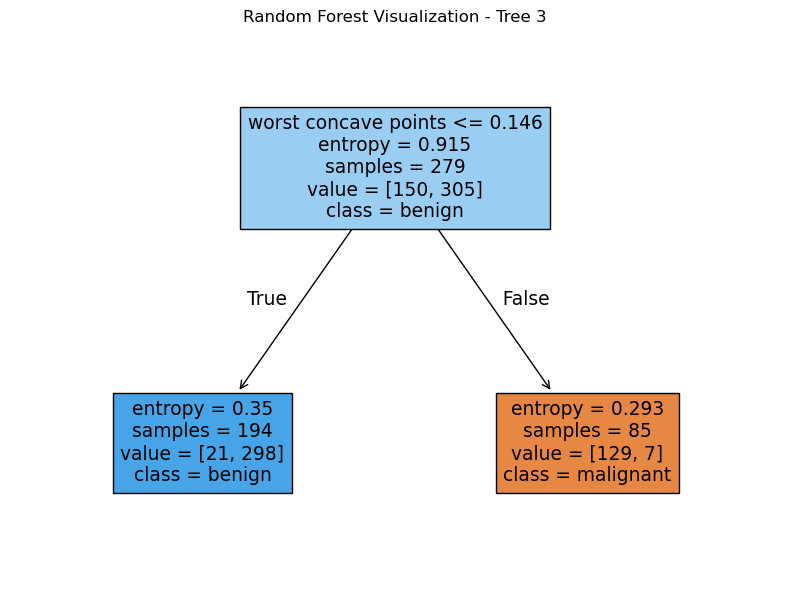

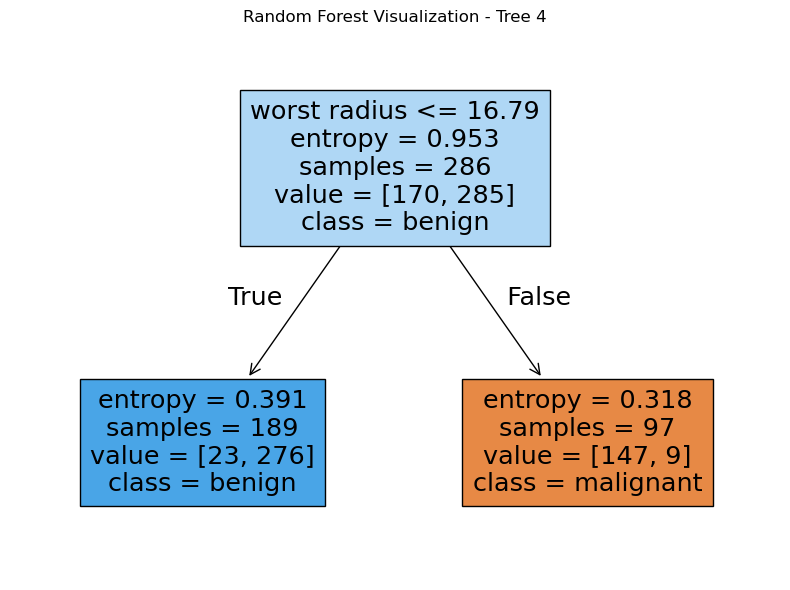

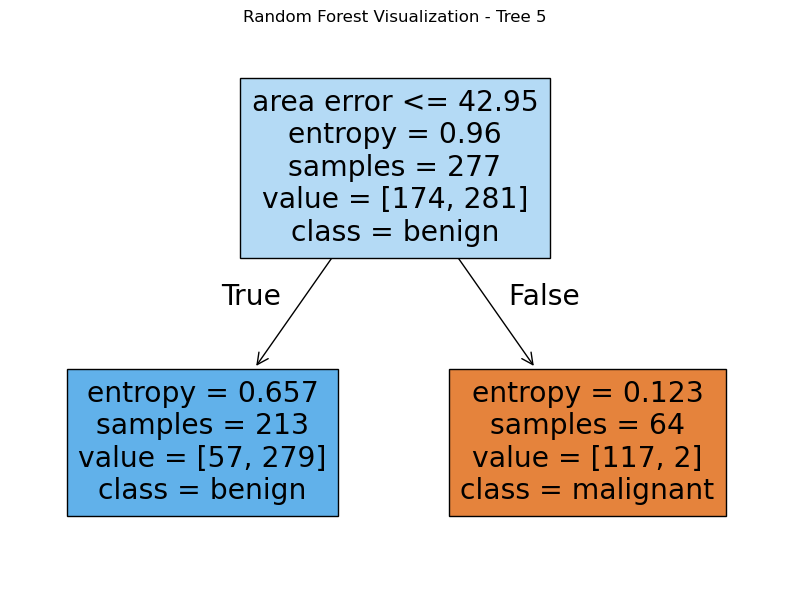

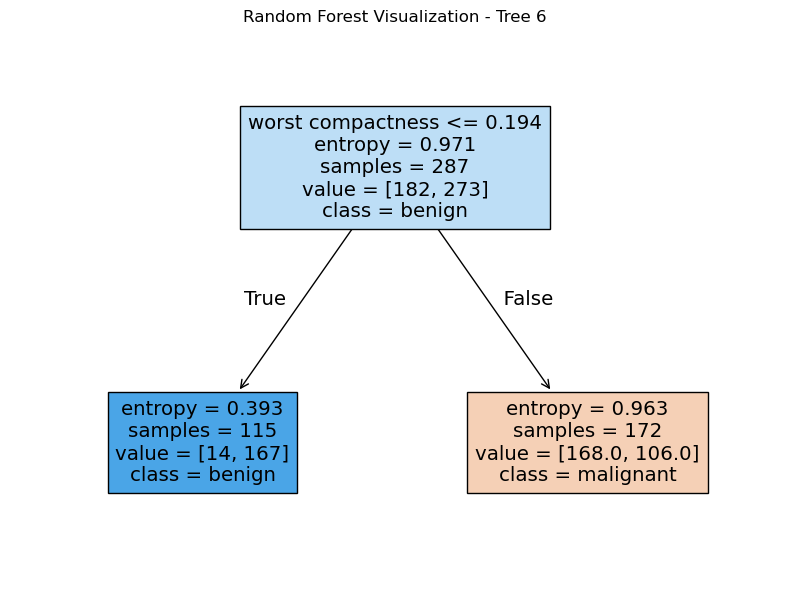

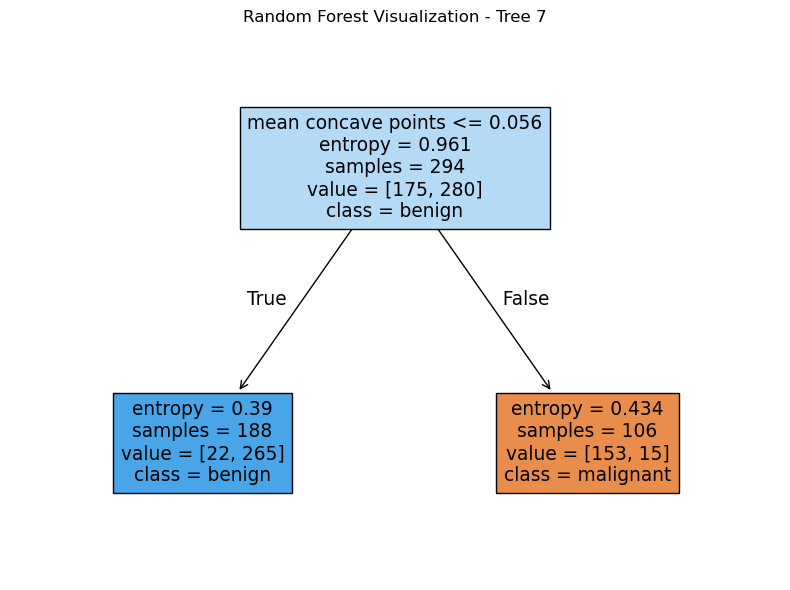

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

for idx, tree in enumerate(rf_sklearn.estimators_):
    plt.figure(figsize=(8,6))
    plot_tree(tree, filled=True, feature_names=list(breast_cancer.feature_names), class_names=list(breast_cancer.target_names))
    plt.title(f"Random Forest Visualization - Tree {idx + 1}")
    plt.tight_layout()
    plt.show()

In [11]:
sample_idx = 112

pd.set_option('display.max_columns', None)
pd.DataFrame(X_test[112].reshape(1, -1), columns=breast_cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.22,27.85,92.55,623.9,0.08223,0.1039,0.1103,0.04408,0.1342,0.06129,0.3354,2.324,2.105,29.96,0.006307,0.02845,0.0385,0.01011,0.01185,0.003589,15.75,40.54,102.5,764.0,0.1081,0.2426,0.3064,0.08219,0.189,0.07796


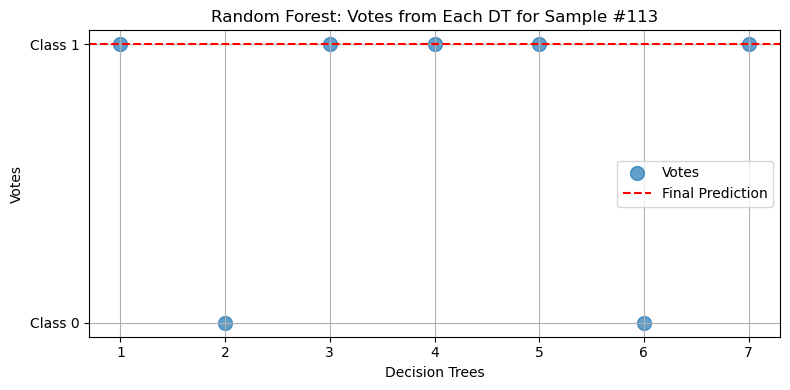

In [12]:
votes = [tree.predict(X_test[112].reshape(1, -1)) for tree in rf_sklearn.estimators_]
final_prediction = rf_sklearn.predict(X_test[sample_idx].reshape(1, -1))[0]

plt.figure(figsize=(8, 4))
plt.scatter([range(1, len(rf_sklearn.estimators_) + 1)], votes, s=100, alpha=0.7, label='Votes')
plt.axhline(y=final_prediction, color='r', linestyle='--', label='Final Prediction')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Decision Trees')
plt.ylabel('Votes')
plt.title(f'Random Forest: Votes from Each DT for Sample #{sample_idx + 1}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()